In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

In [91]:
#Importing the dataset and specifying no header
data = "news_training.xlsx"
news_headlines = pd.read_excel(data, header= None)

In [92]:
#Adding column names
news_headlines.columns = ['Date', 'Headline']
news_headlines.head()

,Date,Headline
0,2018-04-02T00:47:00.000+03:00,"b""Mexican presidential front-runner hits back ..."
1,2018-01-03T01:34:00.000+02:00,"b""Cramer reflects on how Trump's actions are f..."
2,2018-01-03T00:59:00.000+02:00,b'The Wall Street Journal: Peter Thiels VC fir...
3,2018-05-02T14:30:00.000+03:00,"b'WSJ Wealth Adviser Briefing: Catchy Tickers,..."
4,2018-05-02T18:44:00.000+03:00,b'Apple proved that it is no longer just an iP...


In [93]:
#Converting datetime to month/day/year format
news_headlines['Date'] = pd.to_datetime(news_headlines['Date'], infer_datetime_format=True)
news_headlines['Date'] = news_headlines['Date'].dt.strftime('%m/%d/%Y')

In [94]:
news_headlines.head()

,Date,Headline
0,04/01/2018,"b""Mexican presidential front-runner hits back ..."
1,01/02/2018,"b""Cramer reflects on how Trump's actions are f..."
2,01/02/2018,b'The Wall Street Journal: Peter Thiels VC fir...
3,05/02/2018,"b'WSJ Wealth Adviser Briefing: Catchy Tickers,..."
4,05/02/2018,b'Apple proved that it is no longer just an iP...


In [96]:
#Import regex library 
import re

#Cleaning Headlines
news_headlines["Headline"] = news_headlines['Headline'].map(lambda x: re.sub(r'^b', '', x))
news_headlines["Headline"] = news_headlines['Headline'].map(lambda x: re.sub(r'\b["",\']', '', x))
news_headlines.head()
                                        

,Date,Headline
0,04/01/2018,Mexican presidential front-runner hits back at...
1,01/02/2018,Cramer reflects on how Trumps actions are fuel...
2,01/02/2018,The Wall Street Journal: Peter Thiels VC firm ...
3,05/02/2018,WSJ Wealth Adviser Briefing: Catchy Tickers Gu...
4,05/02/2018,Apple proved that it is no longer just an iPho...


In [ ]:
#Listing dataframe
prev = news_headlines.values.tolist()
prev[:4]

In [11]:
#Pre-processing news headlines 
features = news_headlines.iloc[:,1].values
processed_features = []
for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
     # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
     # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
     # Converting to Lowercase
    processed_feature = processed_feature.lower()
    processed_features.append(processed_feature)

In [12]:
processed_features_arr = np.asarray(processed_features)
processed_features_arr

array(['mexican presidential front runner hits back at trump nafta threat blasts pinata treatment ',
       'cramer reflects on how trump actions are fueling the beast market rally ',
       'the wall street journal peter thiels vc firm has made monster bet on bitcoin ',
       ...,
       'the klein law firm announces commencement of class action filed on behalf of super micro computer inc shareholders and lead plaintiff deadline of april 9 2018 ',
       'trump says won build california border wall until whole wall is approved ',
       'sky is the limit in battle for sky '], dtype='<U251')

In [15]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

#Specifying module parameter
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

#defining function for tokenizing input text
def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower()) if not word in set(stopwords.words('english'))]

In [16]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer 
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']',  '{', '}', "%"]

#Vectorizing headlines array 
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
vectorizer = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)        
X = vectorizer.fit_transform(processed_features_arr)

In [17]:
#Extracting word features and number of features
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[:100])

27742
['aa', 'aaa', 'aac', 'aadhaar', 'aak', 'aalborg', 'aam', 'aanholt', 'aaoifi', 'aaon', 'aap', 'aapd', 'aapl', 'aar', 'aaron', 'aarp', 'aat', 'aau', 'ab', 'aba', 'abacus', 'abacusnext', 'abadi', 'abadon', 'abagnal', 'abanca', 'abandon', 'abasolo', 'abat', 'abatti', 'abax', 'abaxi', 'abaya', 'abb', 'abba', 'abbey', 'abbott', 'abbv', 'abbvi', 'abc', 'abcam', 'abcann', 'abdalla', 'abduct', 'abdul', 'abdullah', 'abdulrahman', 'abe', 'abeja', 'abel', 'abello', 'abenom', 'abeo', 'abeona', 'abercrombi', 'aberdeen', 'abernathi', 'aberr', 'abet', 'abf', 'abha', 'abid', 'abil', 'abilifi', 'abiom', 'abituzumab', 'abl', 'ablat', 'ablaz', 'ablin', 'abloy', 'ablynx', 'abm', 'abn', 'abnorm', 'aboard', 'abod', 'abolish', 'abolit', 'abort', 'abp', 'abpro', 'abr', 'abraaj', 'abraham', 'abram', 'abramovich', 'abraplata', 'abras', 'abrau', 'abraxa', 'abreu', 'abri', 'abroad', 'abrupt', 'absa', 'absenc', 'absent', 'absente', 'absentia']


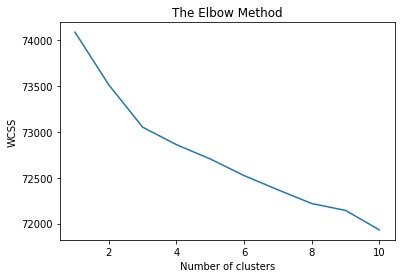

In [18]:
# Applying K-means and plotting graph to determine Elbow and optimum number of clusters
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
%matplotlib inline 

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', max_iter= 100, n_init=5, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
#Fitting K-means model on vectorized headlines array
from sklearn.cluster import KMeans
#Setting number of clusters to elbow value 
true_k = 3
model = KMeans(n_clusters= true_k, init= 'k-means++', max_iter= 100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
# Outputting top 10 terms for each cluster  
print ("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print ("\nCluster %d:" % i, end= " ")
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind], end= " ")
    print

Top terms per cluster:

Cluster 0:  brief  q  share  report  announc  new  earn  loss  million  updat 
Cluster 1:  quarter  result  report  financi  announc  fiscal  dividend  corpor  confer  declar 
Cluster 2:  say  trump  china  market  trade  stock  iran  oil  korea  deal 

In [153]:
#Predicting cluster for news text 
print("Prediction")
P_text = tokenize("Finance quarter result")
P_text = ' '.join(P_text)
Y = vectorizer.transform([P_text])
predicted = model.predict(Y)
print(predicted)

Prediction
[1]


In [ ]:
#Zipping new headlines list with kmeans labels and sorting on labels
labels = model.labels_
result = zip(prev, labels)
sortedR = sorted(result, key=lambda x: x[1], reverse = False)
sortedR[:10]

In [160]:
#Headline history suggestions based on predicted cluster with closest result
for i in range(0, labels.shape[0]):
    if labels[i] == predicted:
        print(prev[i])
        

['02/02/2018', 'Merck posts mixed fourth-quarter results']
['02/01/2018', 'Amazon set to report fourth quarter earnings after the bell']
['05/01/2018', 'Pfizers quarterly profit rises 14%"']
['03/02/2018', 'Chinas second largest e-commerce site JD.com falls on weak quarterly results']
['03/08/2018', 'Fourth quarter went better than previous quarters: Continental CEO']
['03/16/2018', 'Tiffany quarterly revenue rises 8.5% on strong holiday quarter']
['02/14/2018', 'Groupon tumbles on mixed fourth quarter results']
['04/18/2018', 'American Express to report first-quarter earnings after the market close']
['01/19/2018', 'Cramers lightning round: Buy Cisco before its quarterly earnings report']
['04/18/2018', 'Morgan Stanley shares surge after reporting record revenue for the first-quarter']
['04/25/2018', 'Chipotle Mexican Grill to report first-quarter earnings after the bell. Heres what to expect']
['05/30/2018', 'Boxs quarterly results top estimates but stock falls after hefty rally']
['

['05/03/2018', 'EOG Resources Announces First Quarter 2018 Results']
['05/03/2018', 'RE/MAX Holdings Reports First Quarter 2018 Results']
['05/03/2018', 'MyoKardia to Report First Quarter 2018 on Tuesday May 8 2018']
['05/03/2018', 'GoPro Announces First Quarter 2018 Results']
['05/03/2018', 'Alleghany Corporation Reports 2018 First Quarter Results -- Notice']
['05/04/2018', 'HRG Group Inc. Reports Fiscal 2018 Second Quarter Results']
['05/02/2018', 'James River Announces First Results']
['05/03/2018', 'Graham Holdings Company Declares Regular Quarterly Dividend']
['05/01/2018', 'PepsiCo Declares Quarterly Dividend']
['05/01/2018', 'Vectren Corporation Reports Improved Results; Affirms 2018 Guidance']
['05/02/2018', 'Tesla posts quarterly loss']
['05/02/2018', 'Annaly Capital Management Inc. Reports 1st Results']
['05/03/2018', 'Teva Reports First Quarter Financial Results']
['05/03/2018', 'Pingtan Marine Enterprise Schedules 2018 First Quarter Financial Results and Conference Call on 

['05/02/2018', 'QIAGEN Reports Results for First Quarter 2018']
['05/02/2018', 'Allied Motion Increases Quarterly Cash Dividend']
['05/04/2018', 'CEC Entertainment Inc. to Announce First Quarter 2018 Financial Results and Host Conference Call']
['05/03/2018', 'Ecolab Annual Meeting Results Announced']
['05/03/2018', 'Applied DNA Reports Fiscal Second Quarter 2018 Financial Results']
['05/04/2018', 'CBS reports 12.5 percent rise in quarterly revenue']
['05/03/2018', 'Supermicro Announces Third Quarter Fiscal 2018 Preliminary Financial Information']
['05/02/2018', 'Yamana Gold Announces First Quarter 2018 Results Start Up at Cerro Moro and an Update on the Plan for Select Development Opportunities at Chapada']
['05/02/2018', 'Tetra Tech Reports Second Quarter 2018 Results']
['05/02/2018', 'Clearside Biomedical to Report First Quarter 2018 Financial Results on May 9 2018  Conference Call to Follow']
['05/03/2018', 'Universal Technical Institute Reports Fiscal Year 2018 Second Results']
['

['05/07/2018', 'Full House Resorts Announces First Quarter Earnings Release Date']
['05/07/2018', 'KEW MEDIA to Announce Q1 2018 Financial Results May 15th']
['05/07/2018', 'Navios Maritime Acquisition Corporation Announces the Date for the Release of First Quarter 2018 Results Conference Call and Webcast']
['05/07/2018', 'Chimerix Announces First Quarter 2018 Financial Results']
['05/08/2018', 'Cummins Inc. Declares Quarterly Common Stock Dividend']
['05/09/2018', 'Ophthotech Reports Financial and Operating']
['05/09/2018', 'Gulf Resources Announces Conference Call to Discuss First Quarter 2018 Results']
['05/04/2018', 'Sientra to Release First Quarter 2018 Financial Results on Wednesday May 9 2018']
['04/09/2018', 'RYU Apparel Reports Fourth Quarter and 2017 Year End Results']
['05/07/2018', 'Nevro Reports 2018 Financial Results']
['05/07/2018', 'International Game Technology PLC to Host First Quarter 2018 Results Conference Call on Tuesday May 22 2018']
['05/08/2018', 'CCL Industrie

['05/08/2018', 'Newalta Reports First Quarter 2018 Results']
['05/08/2018', 'Qualstar Reports Results for the First Quarter of 2018']
['05/09/2018', 'Cronos Group Inc. to Hold Conference Call on First Quarter 2018 Financial Results']
['05/08/2018', 'Papa Johns Announces First Quarter 2018 Results and Reaffirms 2018 Outlook']
['04/10/2018', 'Torchmark Corporation Announces First Quarter 2018 Earnings Release And Conference Call']
['05/09/2018', 'Adaptimmune Reports First Quarter 2018 Financial Results and Business Update']
['05/09/2018', 'miRagen Therapeutics Reports First Quarter 2018 Financial Results and Provides Corporate Update']
['04/11/2018', 'ForeScout Technologies to Announce First Quarter 2018 Financial Results on Thursday May 10 2018']
['05/08/2018', 'CAPREIT Reports Continued Growth and Strong Operating Performance in First Quarter of 2018']
['05/08/2018', 'Bojangles Inc. Reports Financial for its First Fiscal']
['05/08/2018', 'CytoSorbents Reports Strong First Quarter 2018 

['05/10/2018', 'Pretivm Reports First Quarter 2018 Results']
['05/09/2018', 'BRIEF-RiceBran Technologies Reports Q1 2018 Financial Results And Provides Business Updates']
['05/10/2018', 'Vecima Reports Q3 Fiscal 2018 Results']
['05/10/2018', 'LaSalle Hotel Properties Reports First Quarter']
['05/11/2018', 'Symantec reports smaller quarterly loss']
['05/07/2018', 'Dicerna to Report First Quarter 2018 Financial Results and Host Conference Call on May 14 2018']
['05/07/2018', 'Steel Partners Holdings L.P. Reports First Quarter Financial Results and Outlook']
['05/08/2018', 'New Jersey Resources Board of Directors Declares Quarterly Dividend']
['05/08/2018', 'NuVista Energy Ltd. Announces First Quarter 2018 Financial and Operating Results']
['05/08/2018', 'Aimmune Therapeutics Announces First Quarter 2018 Financial Results']
['05/09/2018', 'CEC Entertainment Inc. Reports Financial Results for the 2018 First Quarter']
['05/08/2018', 'Garrison Capital Inc. Declares Second Quarter 2018 Distri

['05/11/2018', 'Espial Reports First Quarter 2018 Results']
['05/10/2018', 'The Joint Corp. Reports Results']
['05/11/2018', 'Trillium Therapeutics Reports First Quarter 2018 Financial and Operating Results']
['05/10/2018', 'DropCar To Report First Quarter 2018 Results on May 15 2018']
['05/10/2018', 'ArcBest Announces First Quarter 2018 Results']
['05/10/2018', 'Noodles & Company Announces First Quarter 2018 Financial Results']
['05/11/2018', 'TMAC Reports Improving Operating and Financial Results for First Quarter of 2018']
['05/11/2018', 'Galectin Therapeutics Reports 2018 First Quarter Financial Results and Provides Business Update']
['05/11/2018', 'Taro to Announce Full Year Results on May 17 2018']
['03/15/2018', 'Alaska Communications to Announce Q4 and Full Year 2017 Financial Results March 16 and Conduct Conference Call March 19']
['05/10/2018', 'RMG Reports First Quarter 2018 Results']
['05/10/2018', 'Adaptiva Hits Record Revenue for Second Consecutive Quarter; Achieves Profi

['05/15/2018', 'Banc of California Announces Quarterly Dividends']
['05/15/2018', 'APX Group Holdings Inc. Reports First Quarter 2018 Results']
['04/17/2018', 'Mitek to Report Second Quarter Fiscal 2018 Financial Results on May 1 2018']
['05/15/2018', 'Huntsman Announces Second Quarter 2018 Common Dividend']
['05/16/2018', 'Dillards Inc. to Report First Quarter Results']
['05/17/2018', 'VBL Therapeutics Announces First Quarter 2018 Financial Results']
['05/16/2018', 'BioLineRx to Report First Quarter 2018 Results on May 22 2018']
['05/15/2018', 'Canacol Energy Ltd. Reports Q1 2018 Results']
['05/16/2018', 'Hemispherx Biopharma Reports First Quarter 2018 Financial Results and Provides Business Update']
['05/16/2018', 'Zealand Pharma - Interim report for the first quarter of 2018']
['05/15/2018', 'Condor Announces 2018 First Quarter Results']
['04/19/2018', 'Bryn Mawr Bank Corporation Reports Record Quarterly Earnings of $15.3 Million in First Full Quarter with Royal Bank Driven by $7.1 

['04/24/2018', 'BRIEF-PacWest Bancorp Announces Increased Quarterly Dividend']
['04/23/2018', 'Fabrinet to Announce Third Quarter Fiscal-Year 2018 Financial Results on May 7 2018']
['05/24/2018', 'Gourmet Ocean Products Announces Financial Results for the Three Months Ending March 31st 2018']
['05/25/2018', 'Northrim BanCorp Inc. Declares Quarterly Cash Dividend of $0.24 per Share']
['04/24/2018', 'FLEETCOR Technologies to Announce First Results on May 3 2018']
['05/22/2018', 'Photronics Reports Second Quarter Fiscal 2018 Results']
['05/22/2018', 'WESCO International Inc. Announces Its Second Quarter Earnings Call and Upcoming Conference Presentations']
['05/22/2018', 'Clear Channel Outdoor Holdings Inc. Reports Results for 2018 First Quarter']
['05/21/2018', 'DPW Holdings Reports March 31 2018 Financial Results']
['05/21/2018', 'Alta Mesa Reports First Quarter 2018 Results']
['05/22/2018', 'BioLineRx Reports First Quarter 2018 Financial Results']
['05/22/2018', 'Quest Solution Reports

['05/30/2018', 'Hawkins Inc. Reports Fourth Quarter Fiscal 2018 Results']
['05/30/2018', 'Graham Corporation Declares Quarterly Cash Dividend']
['05/30/2018', 'Cisco Declares Quarterly Cash Dividend']
['05/30/2018', 'Leading Brands Inc. Announces Year End Financial Results']
['05/31/2018', 'Aethlon Medical To Release 2018 Fiscal Year End Financial Results and Host Conference Call on June 8 2018']
['05/30/2018', 'Keysight Technologies Reports Second Quarter 2018 Results']
['05/31/2018', 'Webco Industries Inc. Reports Fiscal 2018 Third Quarter Results']
['05/31/2018', 'Vince Announces Reporting Date for First Quarter 2018 Financial Results']
['05/30/2018', 'CubeSmart Declares Second Quarter 2018 Dividend']
['05/31/2018', 'Omni-Lite Industries Reports First Quarter Results']
['05/31/2018', 'American Eagle Outfitters Reports Record First Quarter Sales']
['05/31/2018', 'Kenon Holdings Reports Q1 2018 Results and Additional Updates']
['05/31/2018', 'Delek Group Announces Consolidated First Q